In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,7)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect('Dataset/zomato_rawdata.sqlite')

In [4]:
df = pd.read_sql_query('SELECT * FROM Users',con)

In [5]:
df.drop('index',axis=1,inplace=True)

In [6]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.isna().sum() / df.shape[0] * 100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df.rate = df.rate.str.split('/').apply(lambda x: (x[0].strip()) if x != None 
                                       else np.nan).replace(['NEW','-'],[np.nan,np.nan])

In [11]:
df.rate = df.rate.astype(float)

In [12]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','').astype(float)

In [15]:
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [17]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


##### Analyse Most Famous Dishes of Most Famous Restaurants

Most Famous Restaurant - Restaurants which have delivered most number of orders

In [18]:
df.rest_type.value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [19]:
df.dropna(subset='rest_type',inplace=True)

In [20]:
df.shape

(51490, 17)

In [21]:
df[df.rest_type.str.contains('Quick Bites')].shape

(20639, 17)

In [22]:
df[df.rest_type.str.contains('Casual Dining')].shape

(13057, 17)

In [23]:
qb = df[df.rest_type.str.contains('Quick Bites')]

In [24]:
display(qb.head(2),qb.shape)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari


(20639, 17)

In [25]:
qb.dish_liked

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

In [26]:
qb.dish_liked.value_counts()[:20]

dish_liked
Biryani                                                                                   60
Paratha                                                                                   42
Masala Dosa                                                                               35
Burgers                                                                                   33
Coffee                                                                                    19
Chicken Biryani                                                                           18
Burgers, Coffee, Chocolate Donut, Bagel, Chocolate Drink, Dunkaccinos, Hot Chocolate      17
Faluda, Sandwiches, Paneer Tikka Pizza, Cream Mango, Custard Apple Cream, Veg Sandwich    17
Sandwiches, Rose Faluda, Pizza, Custard Apple Cream, Pav Bhaji                            17
Waffles, Pie, Corn Dog                                                                    17
Burgers, Sandwiches, Momos, Chicken Seekh Roll, Sandwich   

In [27]:
all_dishes = qb.dish_liked.str.lower().str.cat(sep=', ')
all_dishes

'masala dosa, pasta, iced tea, burgers, lassi, chicken grill, naan, momos, chicken burger, biryani, rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap, dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri, burgers, fries, hot chocolate, pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos, biryani, paratha, pasta, pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti, grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls, vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani, rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll, benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa, masala dosa, panipuri, chaat, noodles, dahi bhalle, rooftop ambience, coffee, tea, kesari bath, open dosa, vada, idli, bread dosa, masala dosa, t

In [28]:
import wordcloud

In [29]:
from wordcloud import WordCloud

In [30]:
wordcloud = WordCloud().generate(all_dishes)

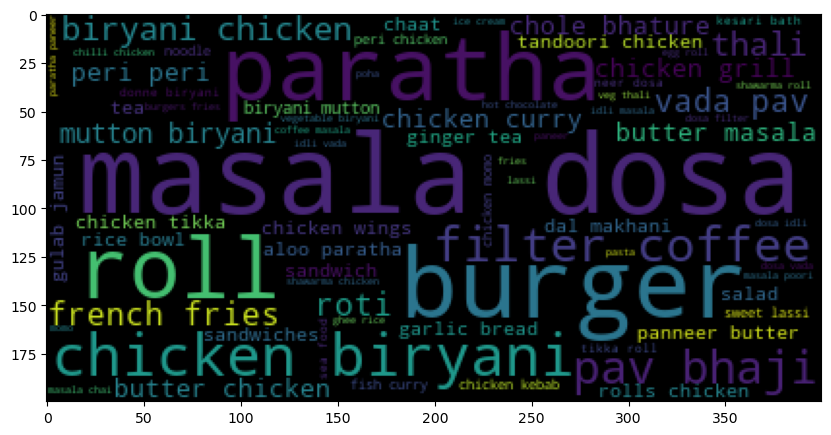

In [31]:
plt.imshow(wordcloud)

### Handling Missing Values

In [32]:
df.isna().sum()/df.shape[0]*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.370752
votes                           0.000000
phone                           2.297534
location                        0.000000
rest_type                       0.000000
dish_liked                     54.226063
cuisines                        0.046611
approx_cost(for two people)     0.627306
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [33]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [34]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [35]:
df[df.rate.isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [36]:
df[df.rate.isna()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=9974)

In [37]:
df[df.rate.isna()]['reviews_list']

72       [('Rated 4.0', 'RATED\n  cost for chicken roll...
75                                                      []
84       [('Rated 4.0', 'RATED\n  Good Location. Small ...
90       [('Rated 1.0', 'RATED\n  Do not order anything...
91                                                      []
                               ...                        
51644                                                   []
51675    [('Rated 4.0', "RATED\n  A divine joint for Fl...
51710    [('Rated 4.0', "RATED\n  A divine joint for Fl...
51713                                                   []
51714                                                   []
Name: reviews_list, Length: 9974, dtype: object

In [38]:
df.reviews_list[72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [39]:
import ast

In [40]:
first_input = ast.literal_eval(df.reviews_list[72])[0]
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [41]:
float([i.replace('Rated ','') for i in first_input][0])

4.0

In [42]:
len(ast.literal_eval(df.reviews_list[72]))

2

In [43]:
# ratings = [ast.literal_eval(df.reviews_list[223].replace('Rated ',''))[i][0] for i in 
#            range(len(ast.literal_eval(df.reviews_list[223])))]
# ratings

In [44]:
# ratings = [float(i) for i in ratings]
# ratings

In [45]:
# avg_rating = sum(ratings)/len(ratings)
# avg_rating

In [46]:
# def get_rate(x):
#   if ast.literal_eval(x) is np.nan or len(ast.literal_eval(x)) <=1:
#     return  
#   ratings = [ast.literal_eval(x.replace('Rated ',''))[i][0] for i in range(len(ast.literal_eval(x)))]
#   ratings = [float(i) for i in ratings]
#   return round(sum(ratings)/len(ratings),2)

In [47]:
def get_rate(x):
    list_of_reviews = ast.literal_eval(x)

    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = ast.literal_eval(x)[0]
        return float([i.replace('Rated ','') for i in first_input][0])

In [48]:
df['rate_from_reviews_list'] = df.reviews_list.apply(get_rate)

In [49]:
df.rate_from_reviews_list[72]

4.0

In [50]:
df.rate[72]

nan

In [51]:
df.rate[72] = df.rate_from_reviews_list[72]

In [52]:
df.rate[72]

4.0

In [53]:
index = df[df.rate.isna()].index

In [54]:
for idx in index:
    df.rate[idx] = df.rate_from_reviews_list[idx]

In [55]:
df.rate.isna().sum()

8464

In [56]:
df.rate_from_reviews_list.isna().sum()

16025

In [57]:
df.drop(['rate_from_reviews_list','dish_liked'],axis=1,inplace=True)

In [58]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Feature Engineering

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51490 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51490 non-null  object 
 1   address                      51490 non-null  object 
 2   name                         51490 non-null  object 
 3   online_order                 51490 non-null  object 
 4   book_table                   51490 non-null  object 
 5   rate                         43026 non-null  float64
 6   votes                        51490 non-null  int64  
 7   phone                        50307 non-null  object 
 8   location                     51490 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  cuisines                     51466 non-null  object 
 11  approx_cost(for two people)  51167 non-null  float64
 12  reviews_list                 51490 non-null  object 
 13  menu_item            

In [60]:
def split_counter(x):
    if x == None:
        return 0
    return len(x.split(', '))

In [61]:
df['total_cuisines'] = df.cuisines.apply(split_counter)
df.total_cuisines

0        3
1        3
2        3
3        2
4        2
        ..
51712    1
51713    1
51714    1
51715    1
51716    3
Name: total_cuisines, Length: 51490, dtype: int64

In [62]:
df['multiple_rest_types'] = df.rest_type.apply(split_counter)
df.multiple_rest_types

0        1
1        1
2        2
3        1
4        1
        ..
51712    1
51713    1
51714    1
51715    1
51716    2
Name: multiple_rest_types, Length: 51490, dtype: int64

In [63]:
# def rate_manager(x):
#     if x == None or x<3.8:
#         return 0
#     else: 
#         return 1

# df['target'] = df.rate.apply(rate_manager)
# df.target

# We can either use function like this, or we can use lambda function as shown below
threshold = 3.8
df['target'] = df.rate.apply(lambda x: 1 if x>=threshold else 0)

In [64]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_rest_types,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1


### Feature Importance

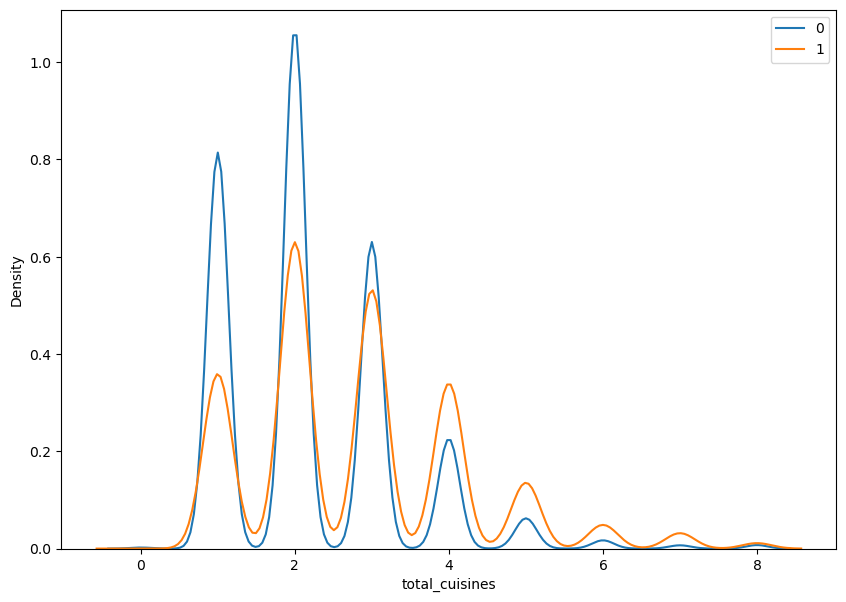

In [65]:
sns.distplot(df[df.target==0].total_cuisines,hist=False)
sns.distplot(df[df.target==1].total_cuisines,hist=False)
plt.legend([0,1])

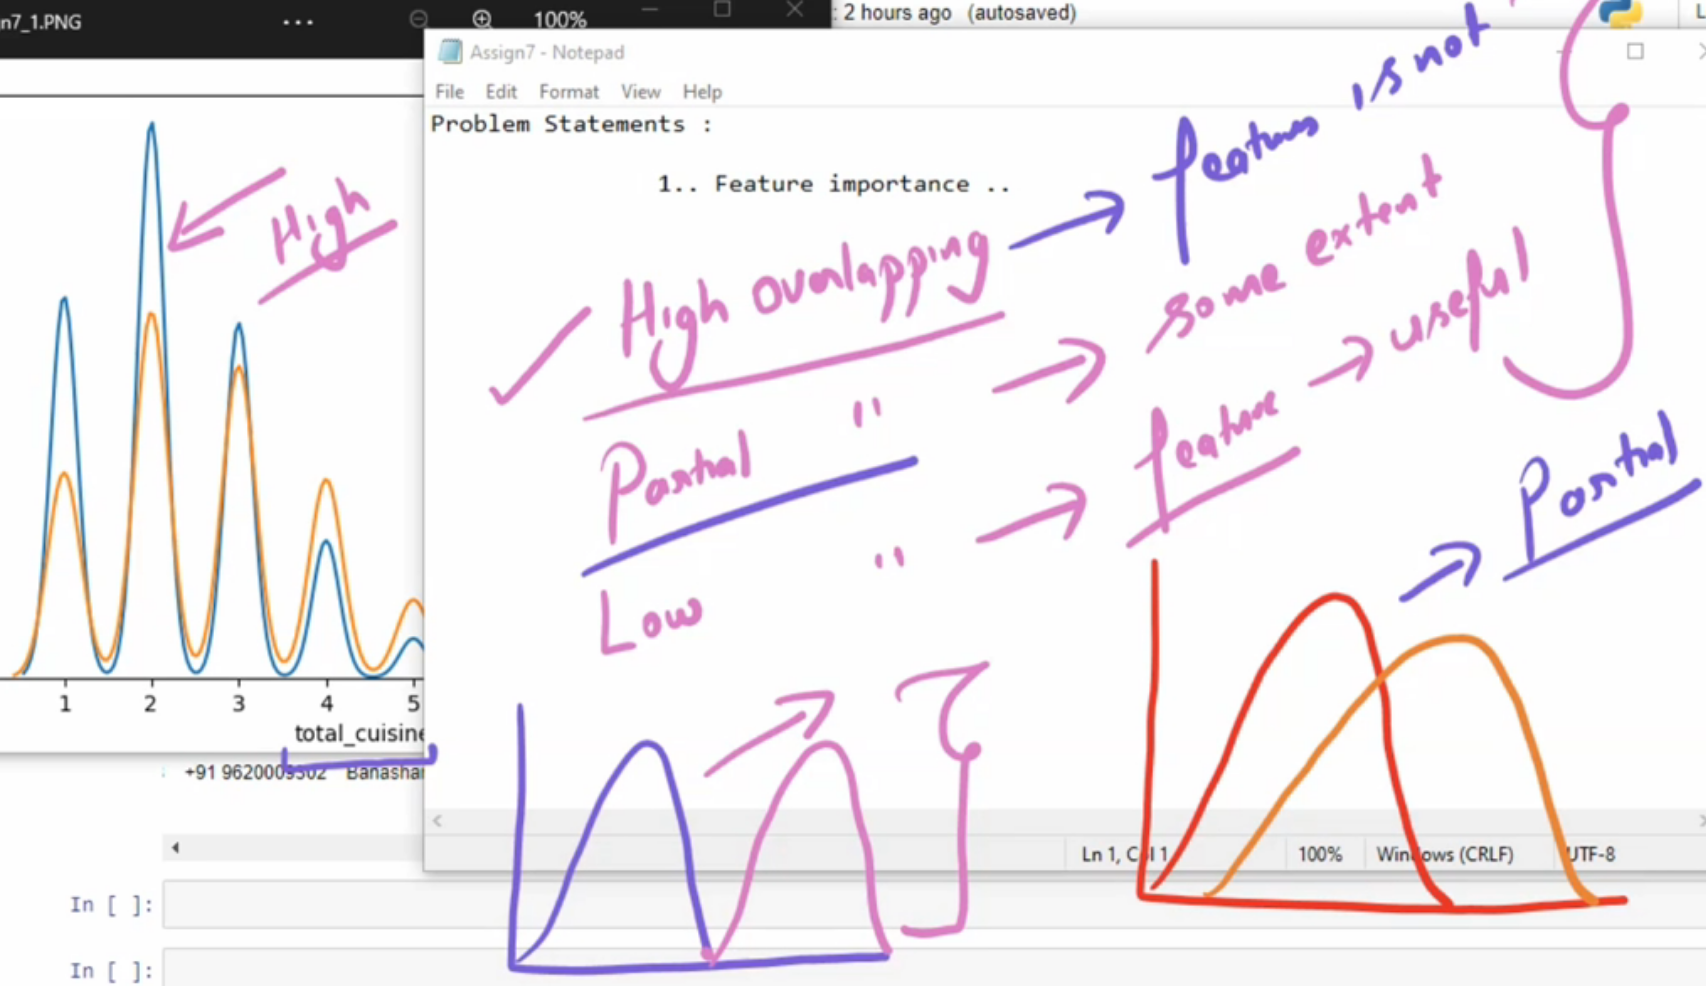

- If the feature is highly ovelapping then it is not useful
- If the feature is partially ovelapping then it is useful to some extent
- If the feature is not ovelapping then it is highly useful

##### Histplot v/s Distplot
- By performing smoothing on histogram, we get distplot
- In histogram we get 'count' on y axis but in distplot we get 'density' on y axis

In [66]:
def distplot(x):
    sns.distplot(x[df.target==0],hist=False,label=0)
    sns.distplot(x[df.target==1],hist=False,label=1)
    plt.legend()

In [67]:
numeric_col = [i for i in df.columns if df[i].dtype!='O']

In [68]:
len(numeric_col)

6

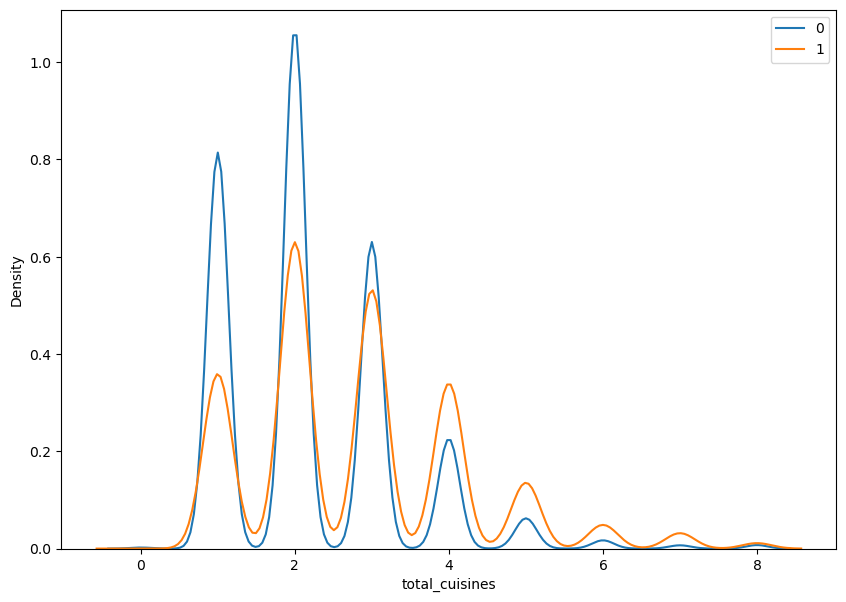

In [69]:
distplot(df.total_cuisines)

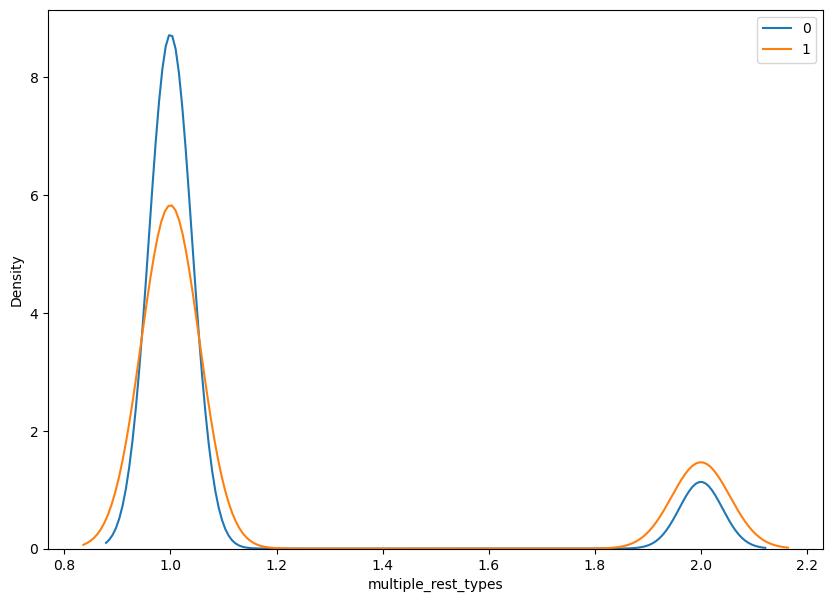

In [70]:
distplot(df.multiple_rest_types)

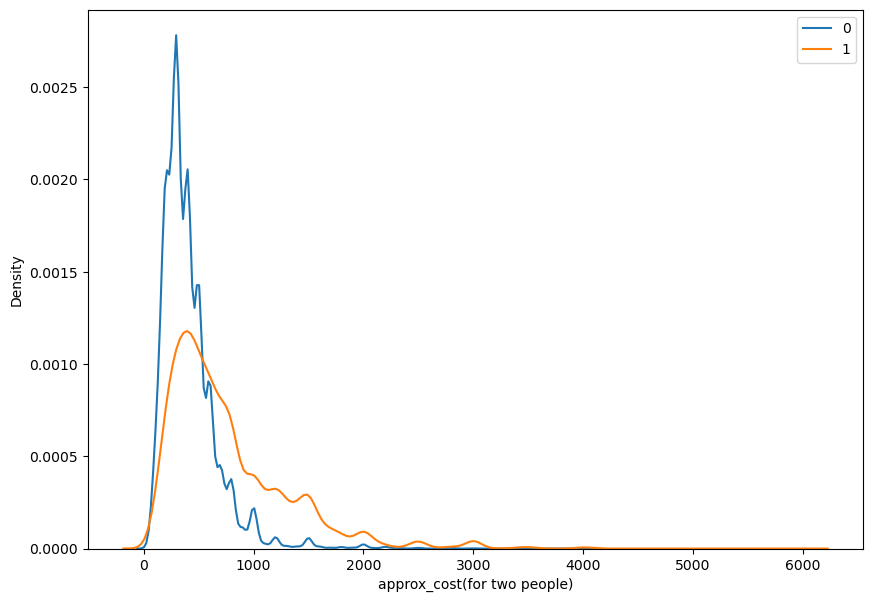

In [71]:
distplot(df['approx_cost(for two people)'])

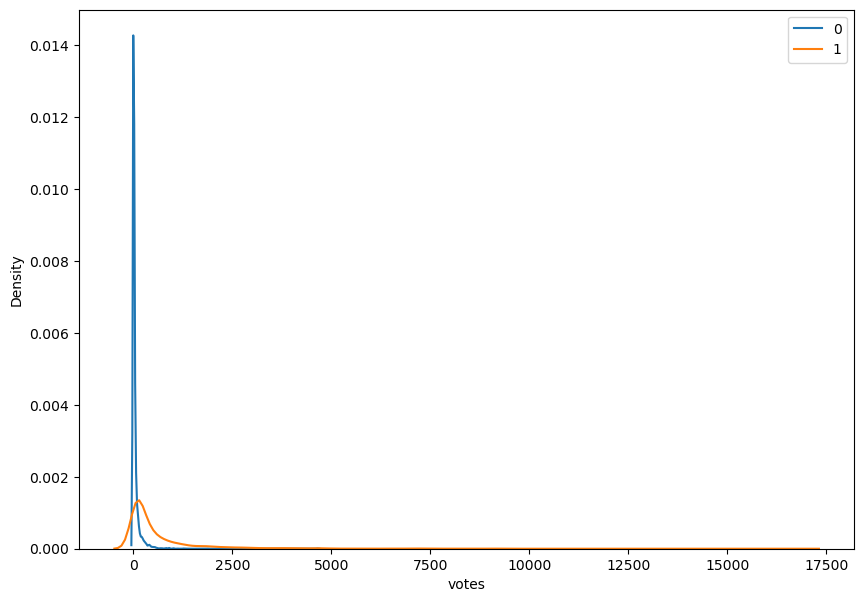

In [72]:
distplot(df.votes)

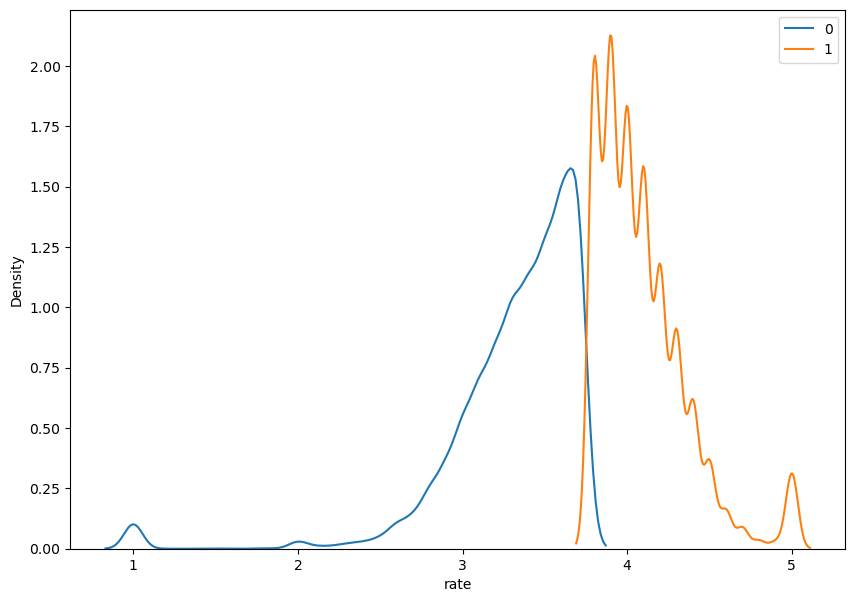

In [73]:
distplot(df.rate)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


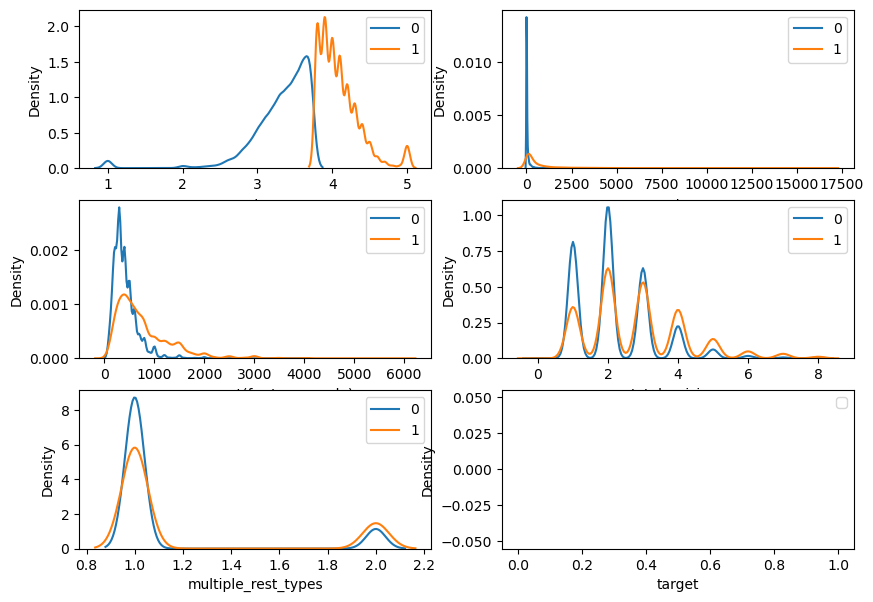

In [74]:
# We can use this code to plot all the above plots
for k,i in enumerate(numeric_col,1):
    plt.subplot(3,2,k)
    distplot(df[i])

### Feature encoding

#### How to select Best Feature Encoding Technique

In [75]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_rest_types,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1


In [76]:
dataframe = df.copy()

In [77]:
dataframe.dropna(inplace=True)
dataframe.shape

(42144, 19)

In [78]:
dataframe.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_rest_types', 'target'],
      dtype='object')

In [79]:
imp_features = ['online_order', 'book_table', 'votes',
                'location', 'rest_type', 'approx_cost(for two people)',
                'listed_in(type)', 'listed_in(city)', 'target']

In [80]:
data = dataframe[imp_features]

In [81]:
data.shape

(42144, 9)

In [82]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target'],
      dtype='object')

#### One-hot Encoding

In [83]:
cat_col = [i for i in data.columns if data[i].dtype == 'O']
cat_col

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [84]:
num_col = [i for i in data.columns if data[i].dtype != 'O']
num_col

['votes', 'approx_cost(for two people)', 'target']

In [85]:
for i in cat_col:
    print(f'{i} has total {data[i].nunique()} unique features') 

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [86]:
freq_cat = data.rest_type.value_counts()[:5]/len(data)*100
freq_cat

rest_type
Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: count, dtype: float64

In [87]:
data[data.rest_type.isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [88]:
data.rest_type = data.rest_type.apply(lambda x: 'other' if x not in freq_cat.index else x)

In [89]:
data.head(2)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1


In [90]:
data['location'].value_counts()/len(data)*100

location
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: count, Length: 92, dtype: float64

In [91]:
pd.get_dummies(data.online_order,prefix='online_order',drop_first=True)

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51709,False
51711,False
51712,False
51715,False


In [92]:
cat_col

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [93]:
for col in ['online_order','book_table','rest_type','listed_in(type)']:
    col_encoded = pd.get_dummies(data[col],prefix=col,drop_first=True,dtype=int)
    data = pd.concat([data,col_encoded],axis=1)
    data.drop([col],axis=1,inplace=True)

In [94]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,Banashankari,800.0,Banashankari,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,Banashankari,800.0,Banashankari,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
data.shape

(42144, 18)

In [96]:
# data.location.unique()

In [97]:
# frame = data.groupby(data['location'])['target'].value_counts().unstack()
# frame.fillna(0,inplace=True)

In [98]:
# success_rate = {frame.index[i]:frame.iloc[i,:][1]/(frame.iloc[i,:][0]+frame.iloc[i,:][1]) 
#                 for i in range(frame.shape[0])}
# success_rate 

In [99]:
# data.location = data.location.map(success_rate)

In [100]:
data.groupby(['location']).target.mean()

location
BTM                  0.329703
Banashankari         0.477124
Banaswadi            0.259494
Bannerghatta Road    0.305071
Basavanagudi         0.523333
                       ...   
West Bangalore       0.250000
Whitefield           0.404599
Wilson Garden        0.286458
Yelahanka            0.500000
Yeshwantpur          0.223214
Name: target, Length: 92, dtype: float64

In [101]:
location_mean = data.groupby(['location']).target.mean().to_dict()
location_mean

{'BTM': 0.3297029702970297,
 'Banashankari': 0.477124183006536,
 'Banaswadi': 0.25949367088607594,
 'Bannerghatta Road': 0.3050713153724247,
 'Basavanagudi': 0.5233333333333333,
 'Basaveshwara Nagar': 0.43283582089552236,
 'Bellandur': 0.32976653696498054,
 'Bommanahalli': 0.07534246575342465,
 'Brigade Road': 0.5205855443732845,
 'Brookefield': 0.4028776978417266,
 'CV Raman Nagar': 0.12903225806451613,
 'Central Bangalore': 0.0,
 'Church Street': 0.8099630996309963,
 'City Market': 0.2727272727272727,
 'Commercial Street': 0.4290322580645161,
 'Cunningham Road': 0.6948051948051948,
 'Domlur': 0.3581730769230769,
 'East Bangalore': 0.16666666666666666,
 'Ejipura': 0.13409961685823754,
 'Electronic City': 0.2615039281705948,
 'Frazer Town': 0.4098939929328622,
 'HBR Layout': 0.5825242718446602,
 'HSR': 0.4899853444064485,
 'Hebbal': 0.5,
 'Hennur': 0.1896551724137931,
 'Hosur Road': 0.5138888888888888,
 'ITPL Main Road, Whitefield': 0.32967032967032966,
 'Indiranagar': 0.66319253976961

In [102]:
data.location = data.location.map(location_mean)

In [103]:
data.location

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

In [104]:
data.groupby(['listed_in(city)']).target.mean()

listed_in(city)
BTM                      0.490403
Banashankari             0.482993
Bannerghatta Road        0.359015
Basavanagudi             0.517114
Bellandur                0.405076
Brigade Road             0.595349
Brookefield              0.358909
Church Street            0.593023
Electronic City          0.264538
Frazer Town              0.518936
HSR                      0.468567
Indiranagar              0.564803
JP Nagar                 0.429164
Jayanagar                0.494428
Kalyan Nagar             0.437073
Kammanahalli             0.443171
Koramangala 4th Block    0.533710
Koramangala 5th Block    0.534954
Koramangala 6th Block    0.537390
Koramangala 7th Block    0.534029
Lavelle Road             0.568414
MG Road                  0.598958
Malleshwaram             0.499471
Marathahalli             0.340701
New BEL Road             0.407986
Old Airport Road         0.531539
Rajajinagar              0.439498
Residency Road           0.577008
Sarjapur Road            0.38700

In [105]:
listed_in_mean = data.groupby(['listed_in(city)']).target.mean().to_dict()
listed_in_mean

{'BTM': 0.4904027098231088,
 'Banashankari': 0.48299319727891155,
 'Bannerghatta Road': 0.35901509134233517,
 'Basavanagudi': 0.517113783533765,
 'Bellandur': 0.4050761421319797,
 'Brigade Road': 0.5953488372093023,
 'Brookefield': 0.3589087809036658,
 'Church Street': 0.5930232558139535,
 'Electronic City': 0.2645381984036488,
 'Frazer Town': 0.518935516888434,
 'HSR': 0.4685672514619883,
 'Indiranagar': 0.5648030495552732,
 'JP Nagar': 0.42916419679905154,
 'Jayanagar': 0.49442755825734547,
 'Kalyan Nagar': 0.4370731707317073,
 'Kammanahalli': 0.44317096466093603,
 'Koramangala 4th Block': 0.5337103088299261,
 'Koramangala 5th Block': 0.5349544072948328,
 'Koramangala 6th Block': 0.5373896888063168,
 'Koramangala 7th Block': 0.5340292275574112,
 'Lavelle Road': 0.5684138869979578,
 'MG Road': 0.5989583333333334,
 'Malleshwaram': 0.49947089947089945,
 'Marathahalli': 0.3407012195121951,
 'New BEL Road': 0.4079861111111111,
 'Old Airport Road': 0.5315391084945332,
 'Rajajinagar': 0.439

In [106]:
data['listed_in(city)'] = data['listed_in(city)'].map(listed_in_mean)

In [107]:
data['listed_in(city)']

0        0.482993
1        0.482993
2        0.482993
3        0.482993
4        0.482993
           ...   
51709    0.406986
51711    0.406986
51712    0.406986
51715    0.406986
51716    0.406986
Name: listed_in(city), Length: 42144, dtype: float64

In [108]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.477124,800.0,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
data.shape

(42144, 18)

### Handling Outliers

In [110]:
data.votes.min(),data.votes.max()

(0, 16832)

In [111]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,42144.0,342.284121,875.817363,0.000000,18.000000,68.000000,261.00000,16832.000000
location,42144.0,0.490888,0.165445,0.000000,0.334725,0.489985,0.58845,0.860417
approx_cost(for two people),42144.0,599.881502,462.293661,40.000000,300.000000,500.000000,700.00000,6000.000000
listed_in(city),42144.0,0.490888,0.078855,0.264538,0.437073,0.517114,0.53739,0.598958
target,42144.0,0.490888,0.499923,0.000000,0.000000,0.000000,1.00000,1.000000
online_order_Yes,42144.0,0.657935,0.474407,0.000000,0.000000,1.000000,1.00000,1.000000
book_table_Yes,42144.0,0.151457,0.358498,0.000000,0.000000,0.000000,0.00000,1.000000
rest_type_Casual Dining,42144.0,0.231563,0.421836,0.000000,0.000000,0.000000,0.00000,1.000000
rest_type_Delivery,42144.0,0.040575,0.197306,0.000000,0.000000,0.000000,0.00000,1.000000
rest_type_Dessert Parlor,42144.0,0.044775,0.206812,0.000000,0.000000,0.000000,0.00000,1.000000


In [112]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [113]:
from scipy import stats

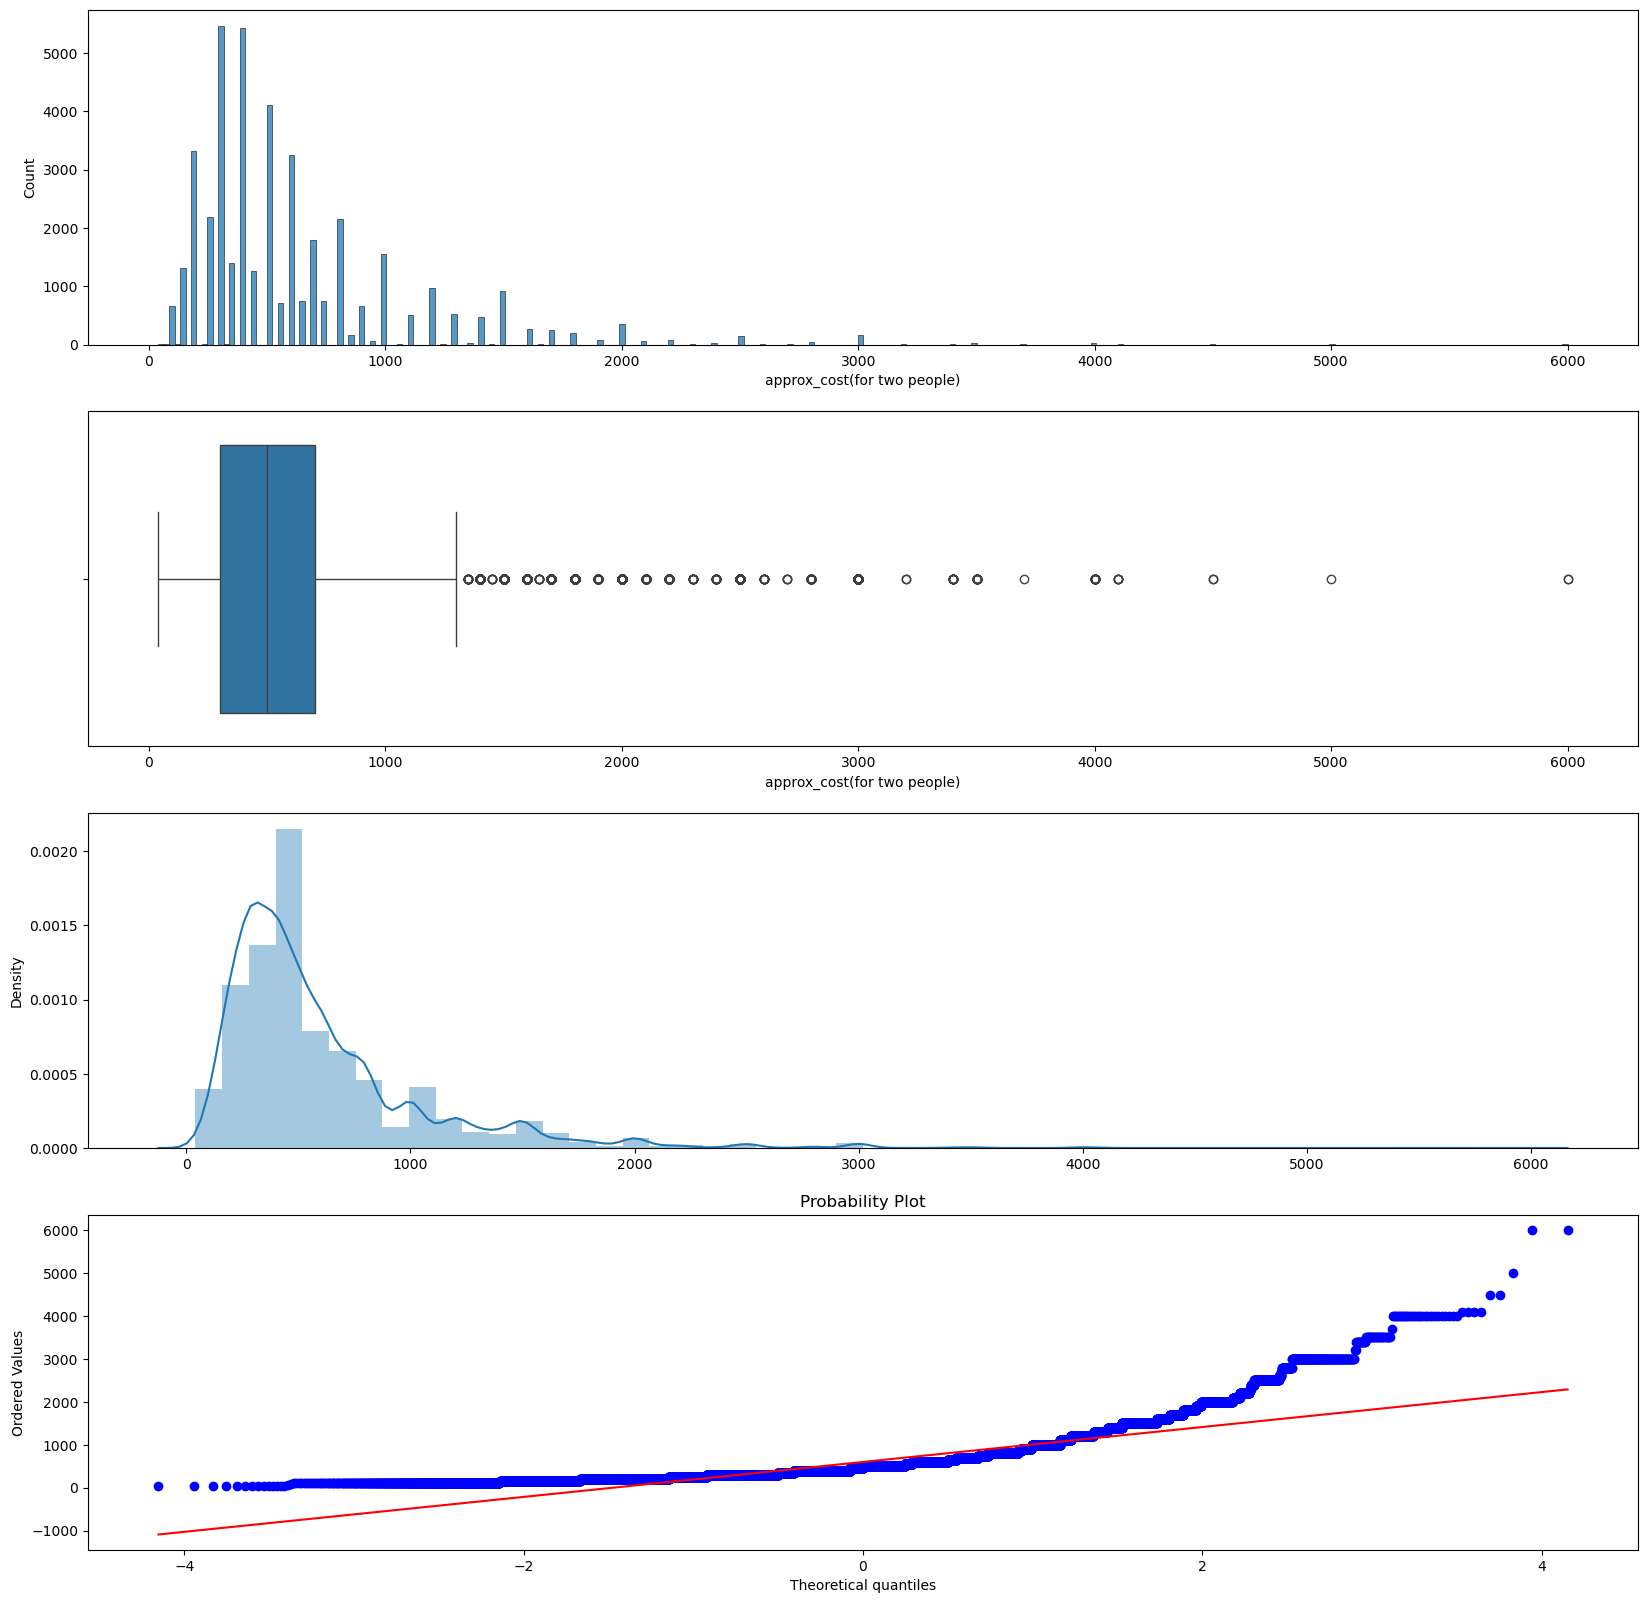

In [114]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.histplot(x=data['approx_cost(for two people)'])
plt.subplot(412)
sns.boxplot(x=data['approx_cost(for two people)'])
plt.subplot(413)
sns.distplot(x=data['approx_cost(for two people)'])
plt.subplot(414)
stats.probplot(x=data['approx_cost(for two people)'],plot=plt)
plt.show()

In [115]:
np.log1p(data['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<Axes: ylabel='Density'>

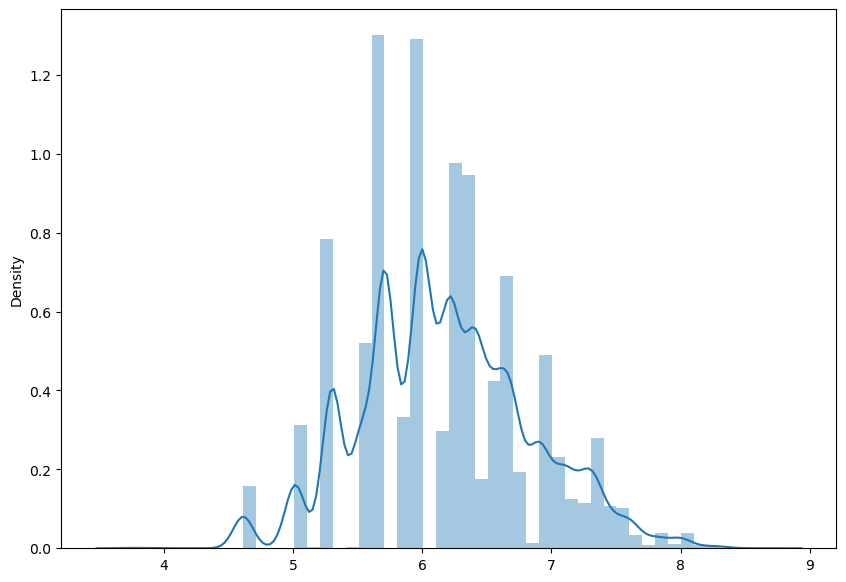

In [116]:
sns.distplot(x=np.log1p(data['approx_cost(for two people)']))

In [117]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

In [118]:
data['approx_cost(for two people)']

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

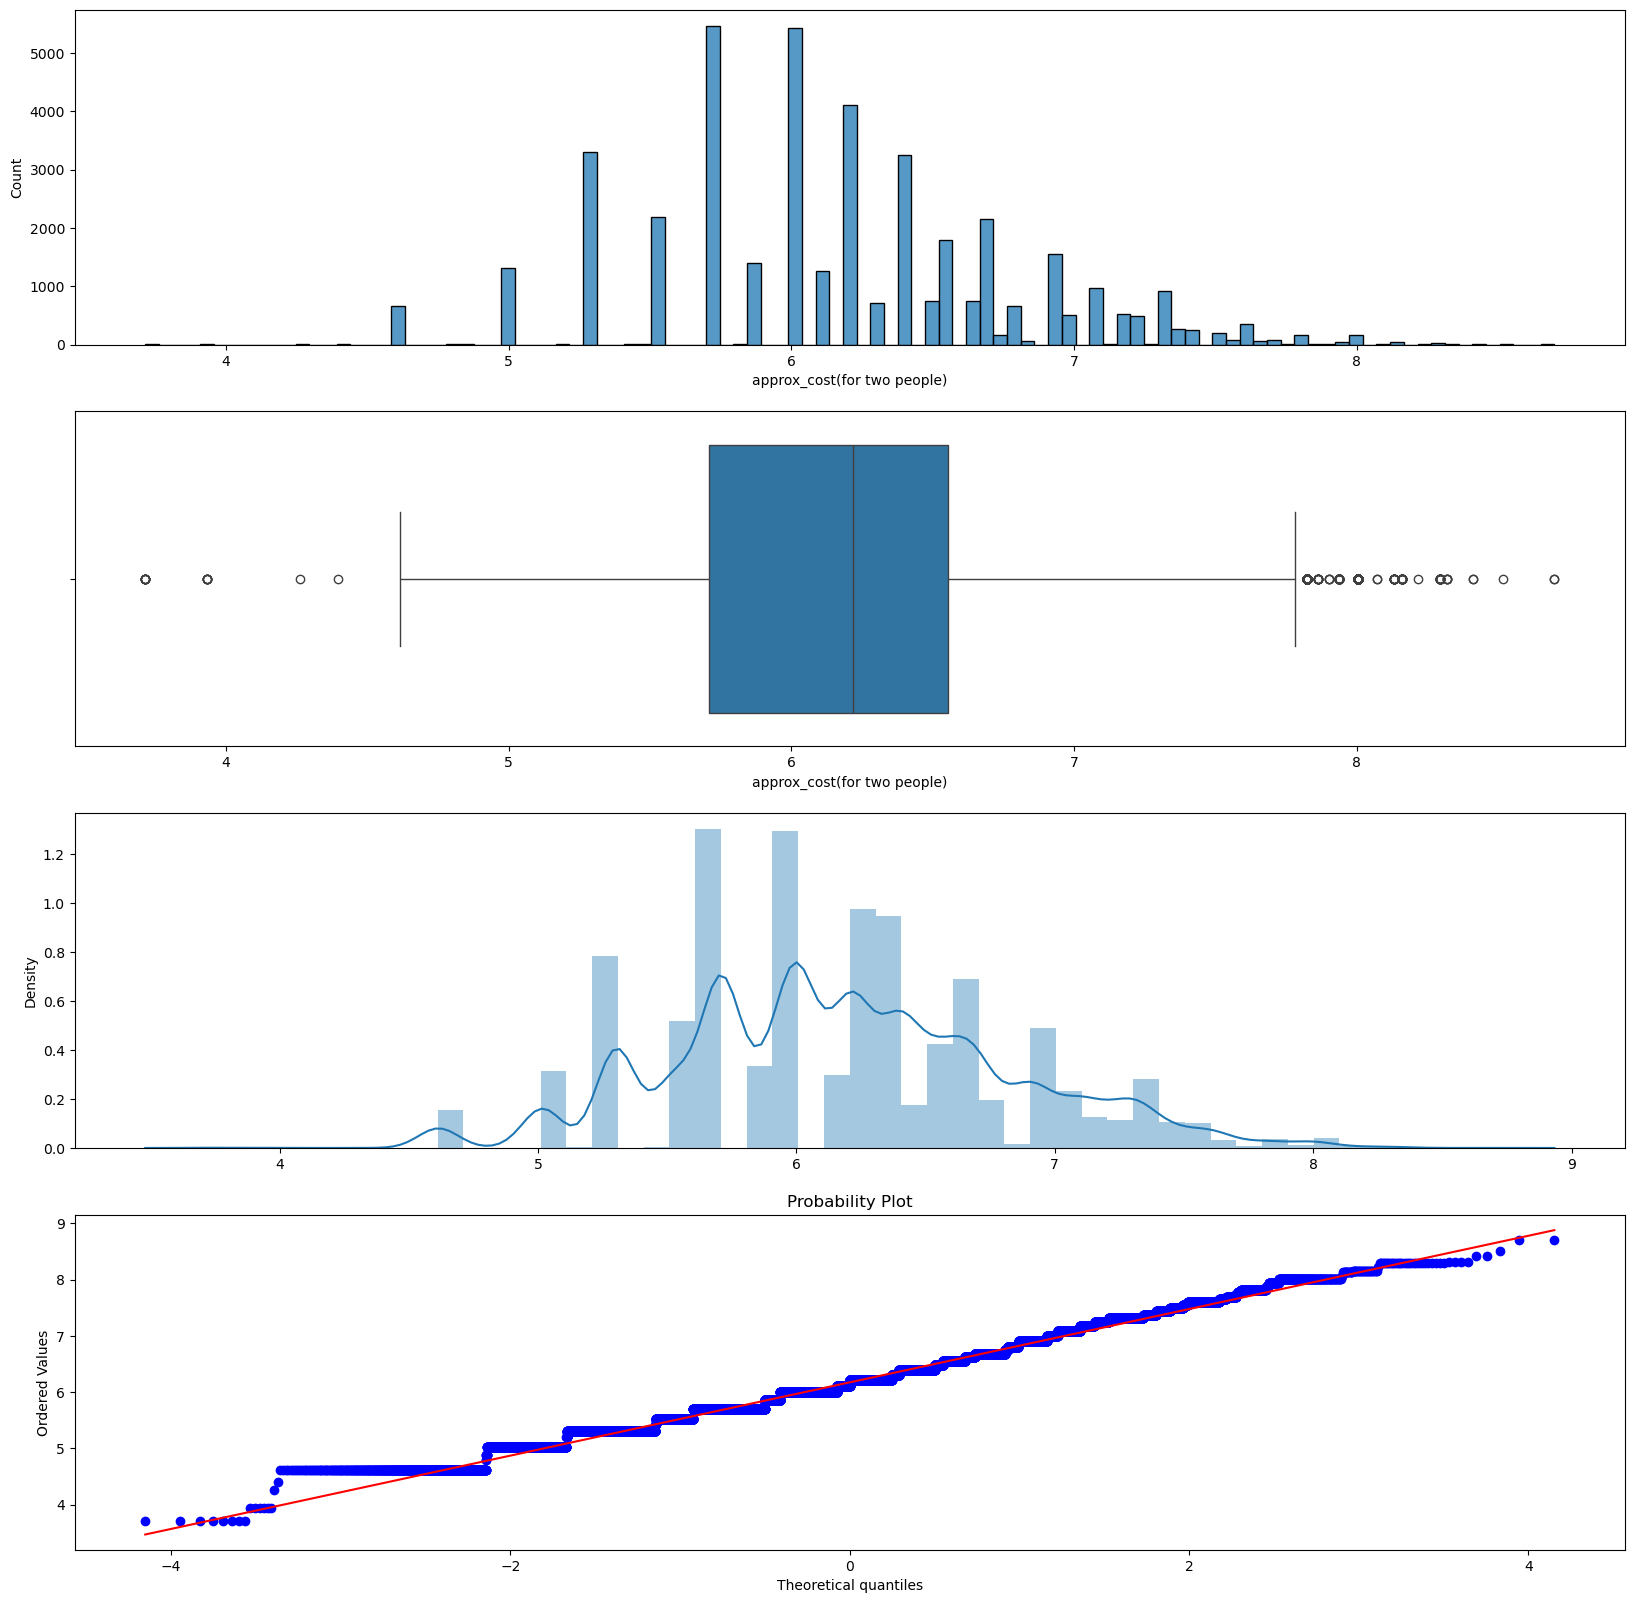

In [119]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.histplot(x=data['approx_cost(for two people)'])
plt.subplot(412)
sns.boxplot(x=data['approx_cost(for two people)'])
plt.subplot(413)
sns.distplot(x=data['approx_cost(for two people)'])
plt.subplot(414)
stats.probplot(x=data['approx_cost(for two people)'],plot=plt)
plt.show()

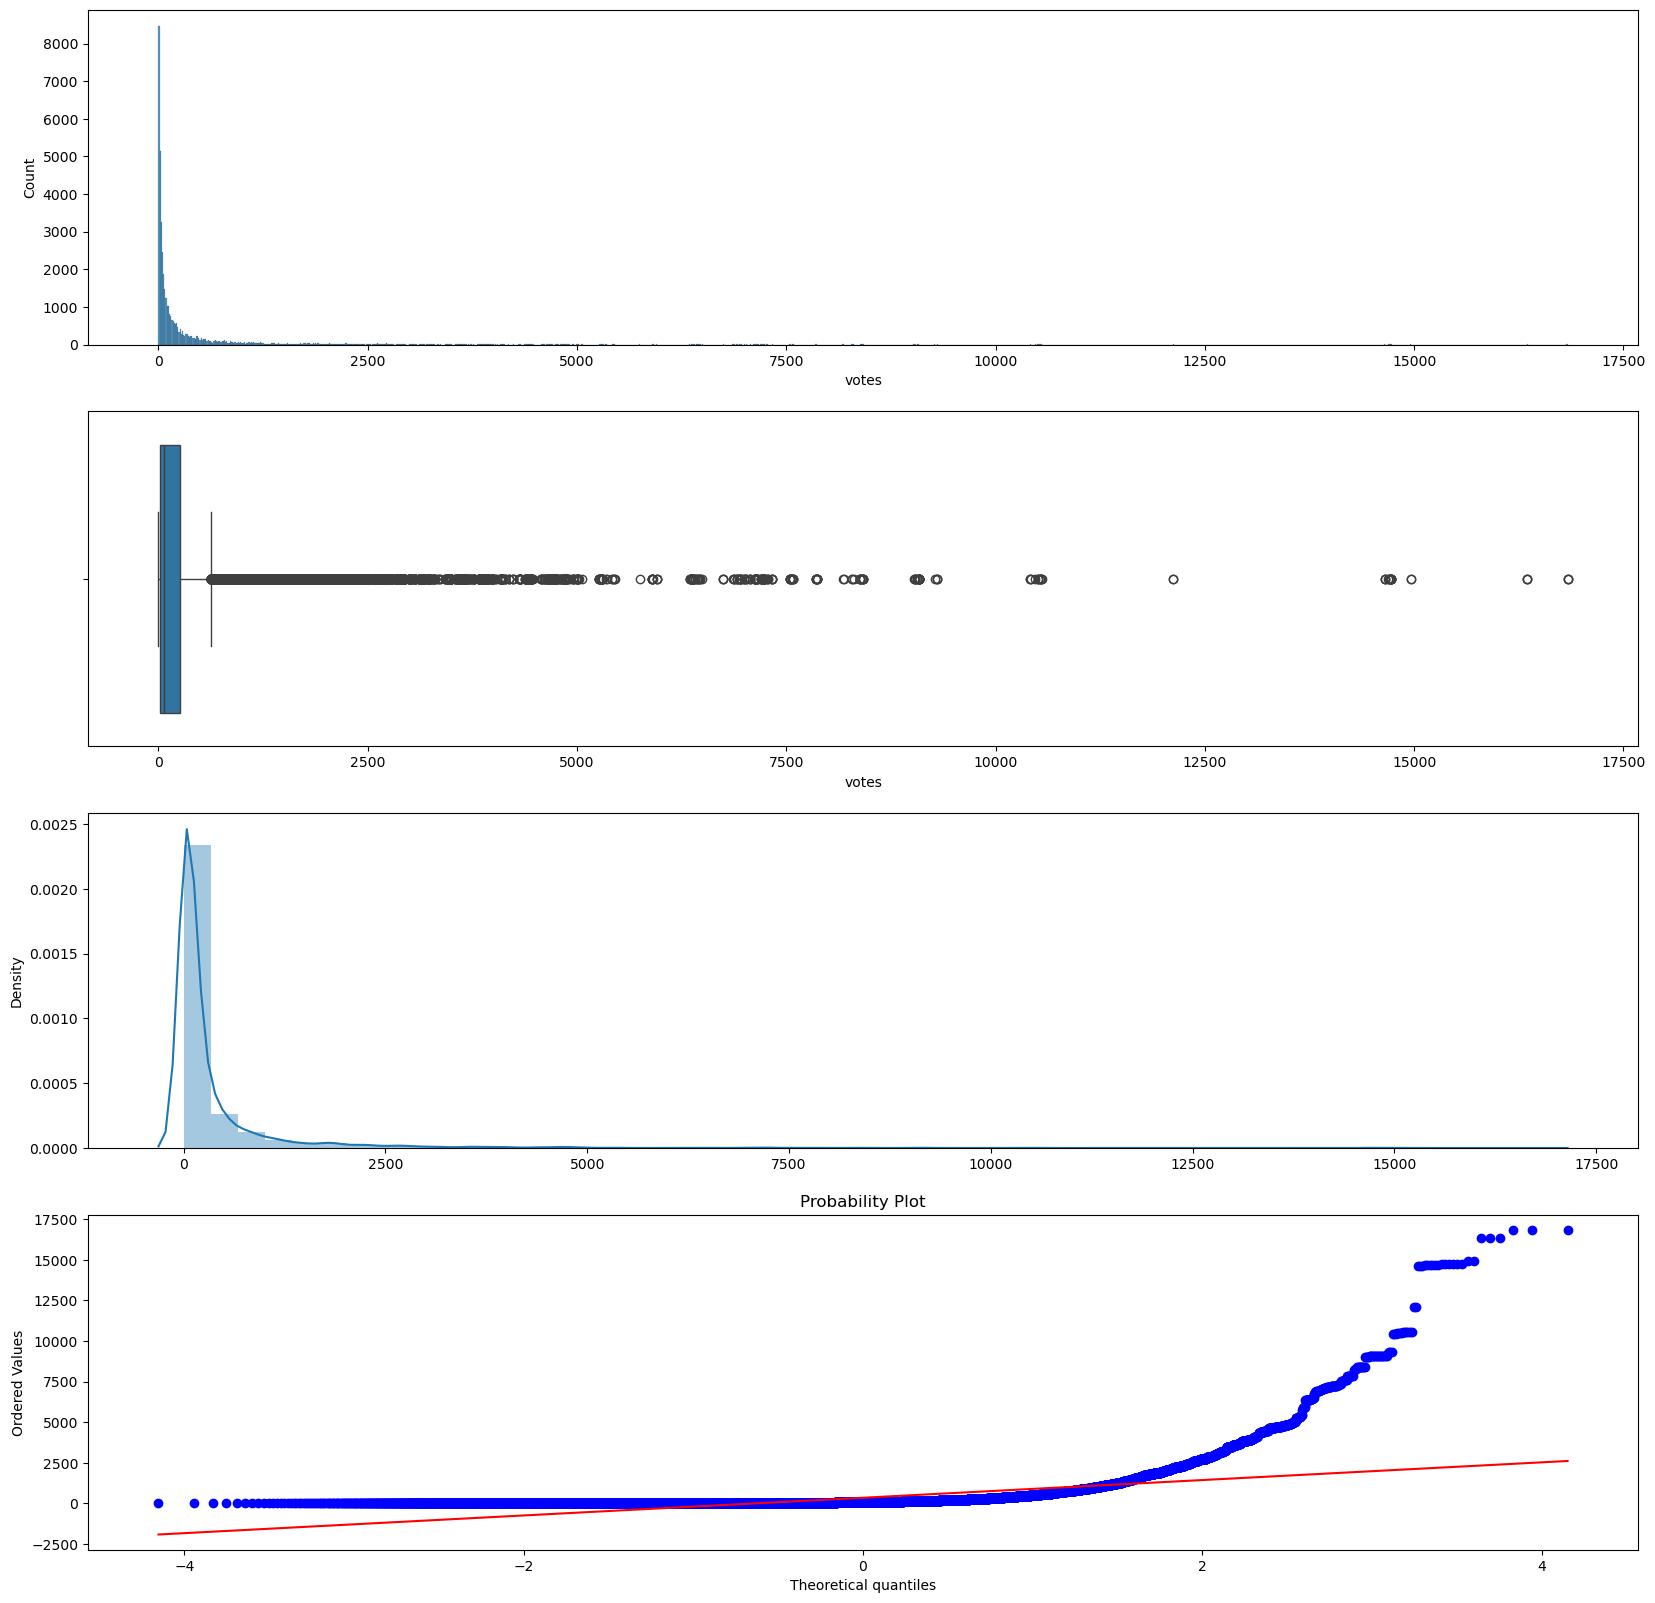

In [120]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.histplot(x=data.votes)
plt.subplot(412)
sns.boxplot(x=data.votes)
plt.subplot(413)
sns.distplot(x=data.votes)
plt.subplot(414)
stats.probplot(x=data.votes,plot=plt)
plt.show()

In [121]:
data.votes = np.log1p(data.votes)
data.votes

0        6.654153
1        6.669498
2        6.823286
3        4.488636
4        5.117994
           ...   
51709    3.555348
51711    4.406719
51712    3.332205
51715    5.468060
51716    2.639057
Name: votes, Length: 42144, dtype: float64

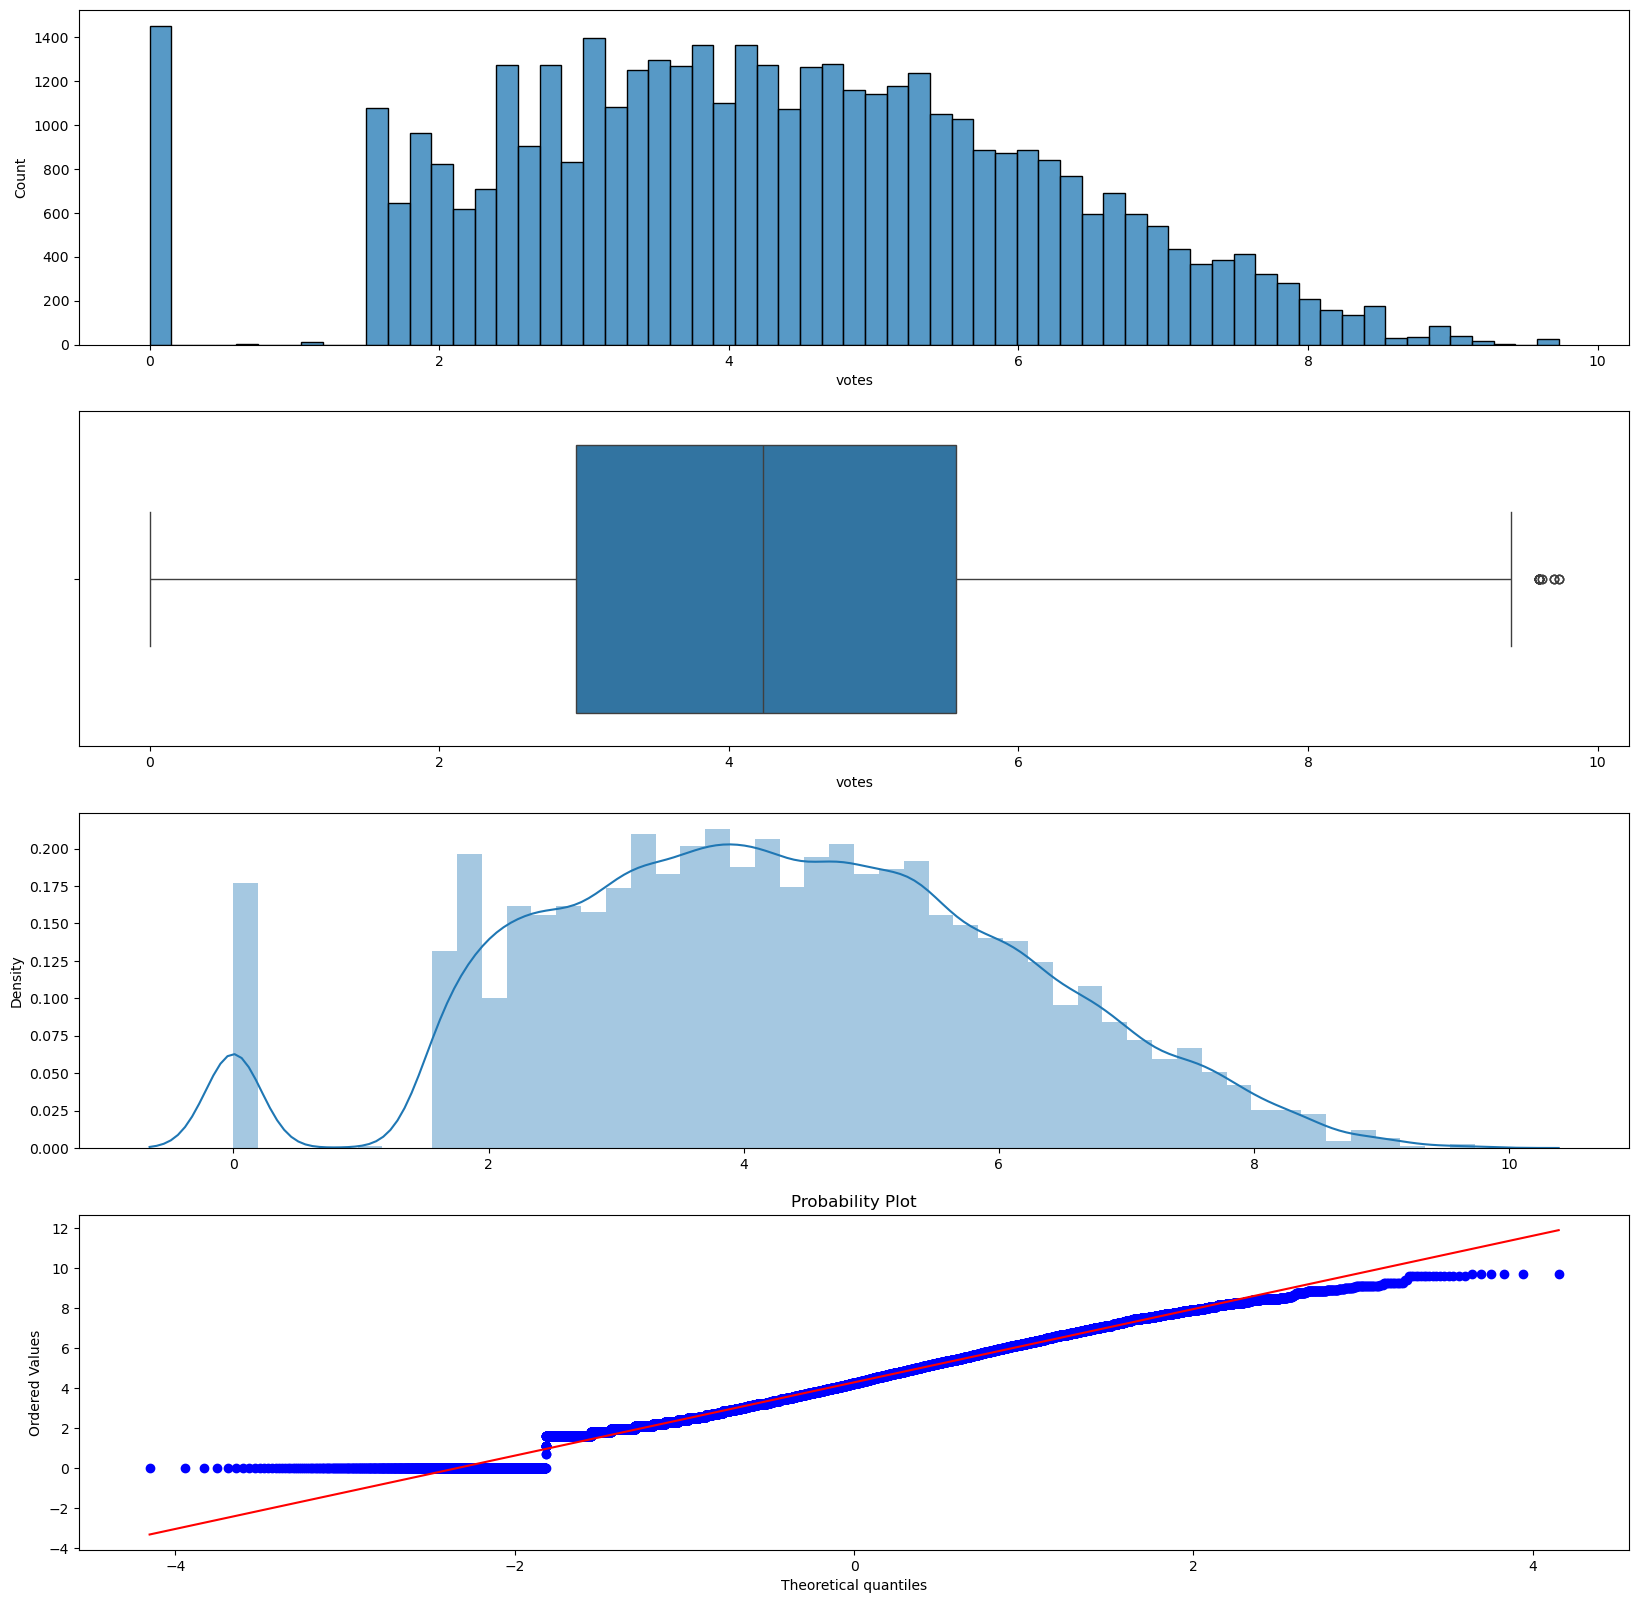

In [122]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.histplot(x=data.votes)
plt.subplot(412)
sns.boxplot(x=data.votes)
plt.subplot(413)
sns.distplot(x=data.votes)
plt.subplot(414)
stats.probplot(x=data.votes,plot=plt)
plt.show()

In [124]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        int64
book_table_Yes                          int64
rest_type_Casual Dining                 int64
rest_type_Delivery                      int64
rest_type_Dessert Parlor                int64
rest_type_Quick Bites                   int64
rest_type_other                         int64
listed_in(type)_Cafes                   int64
listed_in(type)_Delivery                int64
listed_in(type)_Desserts                int64
listed_in(type)_Dine-out                int64
listed_in(type)_Drinks & nightlife      int64
listed_in(type)_Pubs and bars           int64
dtype: object

### Model Building

In [128]:
x = data.drop('target',axis=1)
y = data.target
x.shape, y.shape

((42144, 17), (42144,))

In [129]:
from sklearn.model_selection import train_test_split as tts

In [186]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28236, 17), (13908, 17), (28236,), (13908,))

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rfc = RandomForestClassifier()

In [189]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [190]:
y_pred = rfc.predict(x_test)

In [191]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [192]:
confusion_matrix(y_test,y_pred)

array([[6577,  543],
       [ 693, 6095]])

In [193]:
accuracy_score(y_test,y_pred)

0.911130284728214

### Model Hypertuning

In [200]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter i

In [209]:
random_grid = {'n_estimators':[int(x) for x in np.linspace(100,1200,num=12)],
                'criterion':["gini", "entropy", "log_loss"],
                'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
                'min_samples_split':[2,3,5,10,25,50,75,100],
                'max_features':["auto","sqrt", "log2"]}

In [210]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [211]:
estimator = RandomForestClassifier()

In [212]:
rf_random = RandomizedSearchCV(estimator,param_distributions=random_grid,cv=2,verbose=2)

In [215]:
rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END criterion=log_loss, max_depth=25, max_features=sqrt, min_samples_split=25, n_estimators=900; total time=   9.3s
[CV] END criterion=log_loss, max_depth=25, max_features=sqrt, min_samples_split=25, n_estimators=900; total time=   8.9s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=1100; total time=  14.7s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=1100; total time=  13.6s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=900; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=900; total ti

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 5, 10, 25,
                                                              50, 75, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [216]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=1100)

In [217]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [220]:
rf_opt = RandomForestClassifier(n_estimators = 1100,min_samples_split = 2,max_features = 'sqrt',max_depth = 25,criterion = 'gini')

In [221]:
rf_opt.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=1100)

In [222]:
y_prediction = rf_opt.predict(x_test)

In [223]:
accuracy_score(y_test,y_prediction)

0.9112740868564855